## Multple Linear Regression

The world is more complicated than two dimensions and so we need models for multiple dimensions and multiple features/predictors. 

Below we will look at models that are of the form:
 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_p X_p + \epsilon$$

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# sklearn is new and you may have to install it,  the code is 
# pip3 install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay


In [2]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.nan)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score



# Split the dataset into independent (X) and dependent (y) variables
X = ames[['LotArea', 'GrLivArea', 'BsmtFinSF1']]  # Replace with your actual feature columns
y = ames['SalePrice']  # Replace with your actual target variable column


# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_hat = model.predict(X)

# Evaluate the model
rmse = root_mean_squared_error(y, y_hat)
print('Root Mean Squared Error:', rmse)

# Get the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Root Mean Squared Error: 52475.82525050501
Coefficients: [ 0.33099323 97.83484321 42.29063751]
Intercept: 10413.236800401675


In [8]:


# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     626.2
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          2.29e-261
Time:                        08:53:06   Log-Likelihood:                -17939.
No. Observations:                1460   AIC:                         3.589e+04
Df Residuals:                    1456   BIC:                         3.591e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.041e+04   4244.999      2.453      0.0

So taking the 'monkey' data we get an $r^2$ of $0.872$ or $87.2\%$ which means that 87.2 percent of the variation in the number of primordial follicles that a monkey has can be explained by their age.  

In [ ]:
#Here's another method from the sklearn package 
from sklearn.metrics import r2_score
r2_score(y, y_hat)

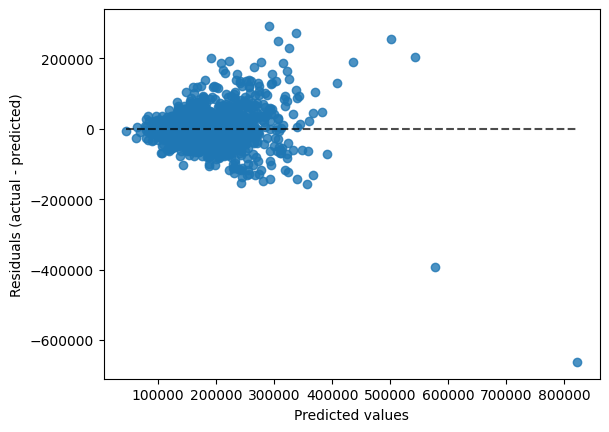

In [12]:

# below makes a 
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

Ooof, that does not look good.  Let's try something.  Take the natural log of Sale Price a

In [13]:
# create a new response 
y2=np.log(ames['SalePrice'])



# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(X)

#fit linear regression model
model3 = sm.OLS(y2, x2).fit()

#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     583.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          4.08e-249
Time:                        09:01:48   Log-Likelihood:                -154.73
No. Observations:                1460   AIC:                             317.5
Df Residuals:                    1456   BIC:                             338.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1778      0.022    513.628      0.0

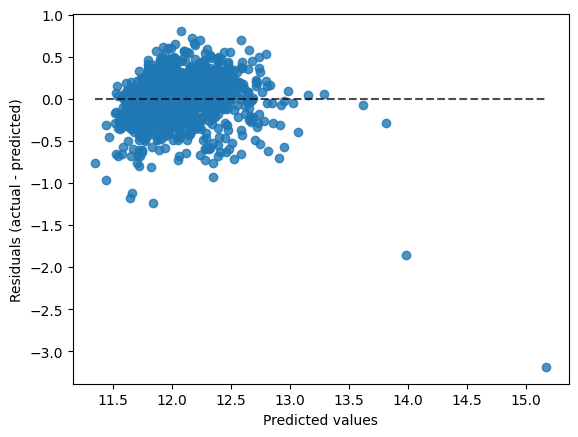

In [15]:
# below makes a 
y2_hat = model3.predict(x2)
display = PredictionErrorDisplay(y_true=y2, y_pred=y2_hat)
display.plot()
plt.show()

Minus a couple of outliers the model looks better.  We'll come back to this....*stay tuned*.

#### Root Mean Squared Error
The next measure of how well a model does is the 'root mean squared error' or RMSE.  To understand this metric, we need to go back to the calculation of the standard deviation.  That calculation is
$$s =\sqrt{ \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2}. $$

And that quantity, $s$, we interpret as the average difference from the mean.  

For a linear regression with a single predictor, the root mean squared error is $$s_e =\sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat{y_i})^2}. $$  A couple of things here: First, the part that is being squared is the residual.  Second, the part under the square root is a  sum that we are dividing by $n-2$ which is usually close to $n$ so it is like the mean of the squared errors.  Third, we are taking the square root, so putting those three together we get the 'root mean squared error' or RMSE.

We interpret the RMSE as the average difference between the observed values and the predicted values from our regression line.  So this is a measure as the average size of a residual or the average difference between an observation and the prediction line.

In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y, y_hat)

So, on average, the difference between the predicted number of primordial follicles and the observed number of primordial follicles is 5.06.  

### Predictions

Above we saw how to get the predicted values for the data that we observed.

In [ ]:
# get the predicted values from the model
monkey['y_hat'] = model.predict(x) 
print(monkey)

Now if we want to get predicted *pf* for when a monkey is 2.1 years of age or 3.0 or 5.9.

In [ ]:
# make a dataframe for predictions at age is 2, 3 and 5
x_pred = pd.DataFrame({'age': [ 2.1, 3.0, 5.9]})
# code to have the model give us the predicted values at the ages in x_pred
model.predict(x_pred)

These are the predicted values for age=2.1, 3.0 and 5.9 respectively.  

#### Extrapolation

One thing to be careful of is that linear regression like all models is not intelligent.  We can get the model to give us predictions that are not reasonable.  Extrapolation is the idea that we are extending the model beyond the range of our features.  In particular, we don't know that the linear relationship that we have when age is between 1.3 and 8.4 continues to hold for values of age outside that range.  It is likely that our predictions will be good when we move slightly beyond that range.  

In [ ]:
x_pred2=pd.DataFrame({'age':[32,712,-4]})
model.predict(x_pred2)

First the model gives us predictions for all three of the values for age.  The first value, $32$, might be a large age but it is clearly outside the range of our data and so that prediction is one that we should approach with skepticism.  An age of $712$ and an age of $-4$ both seem to be impossible for a monkey, and yet, the model gives us a value. 



### Inference about predictors

Make confidence intervals and doing hypothesis tests on the slope and y-intercept of our model are sometimes important for a linear regression with a single predictor.  

In [ ]:
# we need another package to get this output
import statsmodels.api as sm

# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
x2 = sm.add_constant(x)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

There is quite a bit of output here but we only are interested in some pieces.  Note that the 'R-squared' here is what
we saw above.  The number of observations, $20$, is given by 'No. Observations.'  

The other things we will care a good deal about, for now, are in the table in the middle between the "====" lines that starts with *coef*, *std err*.  This table is a summary of the slope and intercept. The rows labels are 'const' and 'age' which correspond to the y-intercept and the slope respectively.  The column headings are 'coef', 'std err', 't', 'P>|t|', '[0.025', and '0.975]'.  

These are:

    *coef* is the estimate of the parameter

    *std err* is the standard error
    
    *t* is the test statistics for a hypothesis test of $=0$ vs $\neq 0$
    
    *P>|t|* is the p-value for the hypothesis test above
    
    *[0.025* is the lower end of a $95\%$ confidence interval for the parameter
    
    *0.975]* is the upper end of a $95\%$ confidence interval for the parameter

So that a $95\%$ confidence interval for the slope would be $(-8.13,-5.53)$.


Below is the code for making a general confidence interval for the slope:
        for df we use the *Df Residuals* from the output above
        for loc we use the *coef* for age from above
        for scale we use the *std err* for age from above



In [ ]:

# confidence interval for a slope
lower, upper = st.t.interval(confidence=0.99, 
              df=18, 
              loc=-6.8301,  
              scale= 0.618) 
print(round(lower,2), round(upper,2))

Our interpretation is that for each additional year of age for a monkey we expect (or we predict) that the number of primordial follicles that the monkey has will drop between 8.61 and 5.05 follicles with 99% confidence.

Some notes:
    *Df Residuals* stands for degrees of freedom for residuals

    *coef* is short for coefficient which is a mathematical term for the quantity in front of a variable
    
    *std err* is short for standard error which is the estimated standard deviation

### Blue Jays

We'll now look at some data about Blue Jays, the birds.  

Details on the data can be found at this link:
[<https://rdrr.io/rforge/Stat2Data/man/BlueJays.html>]

We'll focus on predicting Blue Jay body mass in grams (*Mass*) from skull size in mm (*Skull*). 

In [ ]:
bluejay = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BlueJays.csv", na_values=['NA'])
# remove rows with missing data
bluejay.dropna(inplace=True)
bluejay.head()



In [ ]:
# In sklearn we first need to create a model object 
# and here it is a linear regression
bluejay_model1= LinearRegression()
# note below that the x needs to be a two dimensional array so we 
# need the double brackets here
bluejay_x=bluejay[['Skull']]
# y needs to be a one dimensional array so single brackets work
bluejay_y=bluejay['Mass']
bluejay_model1.fit(bluejay_x, bluejay_y)

bluejay_y_hat = bluejay_model1.predict(bluejay_x)
# below makes a 
display = PredictionErrorDisplay(y_true=bluejay_y, y_pred=bluejay_y_hat)
display.plot()
plt.show()

The above plot is pretty good.    So we can continue to use and evaluate this model.   


In [ ]:
# this is code for making the qqplot

# get the predicted values from the model
bluejay_y_hat = bluejay_model1.predict(bluejay_x)  
# calculate the residuals 
bluejay_residuals = bluejay_y -bluejay_y_hat
# generate the qq plot and put a line through the points to help us visualize the relationship here    
sm.qqplot(bluejay_residuals, line ='s') 
# 
py.show() 

From the above qqplot, the points fall pretty closely along the line so that condition for using the model seems to be met.

So next we will get the slope and y-intercept.

In [ ]:
# for this particular model formulation we need to add a 
# column of 1's to the feature array
#add constant to predictor variables
bluejay_x2 = sm.add_constant(bluejay_x)

#fit linear regression model
bluejay_model2 = sm.OLS(bluejay_y, bluejay_x2).fit()

#view model summary
print(bluejay_model2.summary())

So from the above output for our regresion, we get some useful information.

First, the prediction equation is $\hat{y} = -17.20 + 2.88$ bill_length_mm.  So our estimated slope is 2.88 and our estimated y-intercept is -17.20.  

This means that we would predict the body mass of a blue jay  with a skull size of zero mm to be -17.2g.  And for each additional millimeter of skull size that a blue jay has, we would predict that their body mass would be 2.88 grams larger.

The $r^2$ value here is 0.306 which indicates that $30.6\%$ of the variability in body mass of a blue jay can be explained by the relationship with their skull size.  

A couple of other things to highlight here: The p-value for the hypothesis test that the y-intercept is zero is $0.160$ which is large and so we can reasonably conclude that the y-intercept is not discernibly different from zero.  

Turning to the hypothesis test for the slope, we can reject the null hypothesis that the slope is zero since the p-value is small, $0.000$.  Thus, we can conclude that the slope is statistically discernible from zero.




### Another example with Ames Housing Data

Let's return to the Ames Housing data

Before we described this 

### Tasks

1. Using the Blue Jays data, fit a regression model to predict body mass using head size, and plot the residual plot and the qqplot.  What do they tell you about the regression model.

2. Find and interpret the slope and intercept for this regression model in the context of these data.

3. Predict the body mass of a blue with a head size of 57mm and a head 53 mm.

4. Find $r^2$ for this model and interpret in the context of these data.

5. Create a $99\%$ confidence interval for the slope and interpret it.

6. Find the p-value for the hypothesis test of the slope.  What do you conclude from that?

7. Find an interpret the $RMSE$ for this model.